In [1]:
import torch
from torch.nn import functional as f

import matplotlib.pyplot as plt
import numpy as np

from time import perf_counter
np.set_printoptions(precision=2)

[2.42 2.36 2.34 2.39 2.46 2.45 2.49 2.47 2.85]


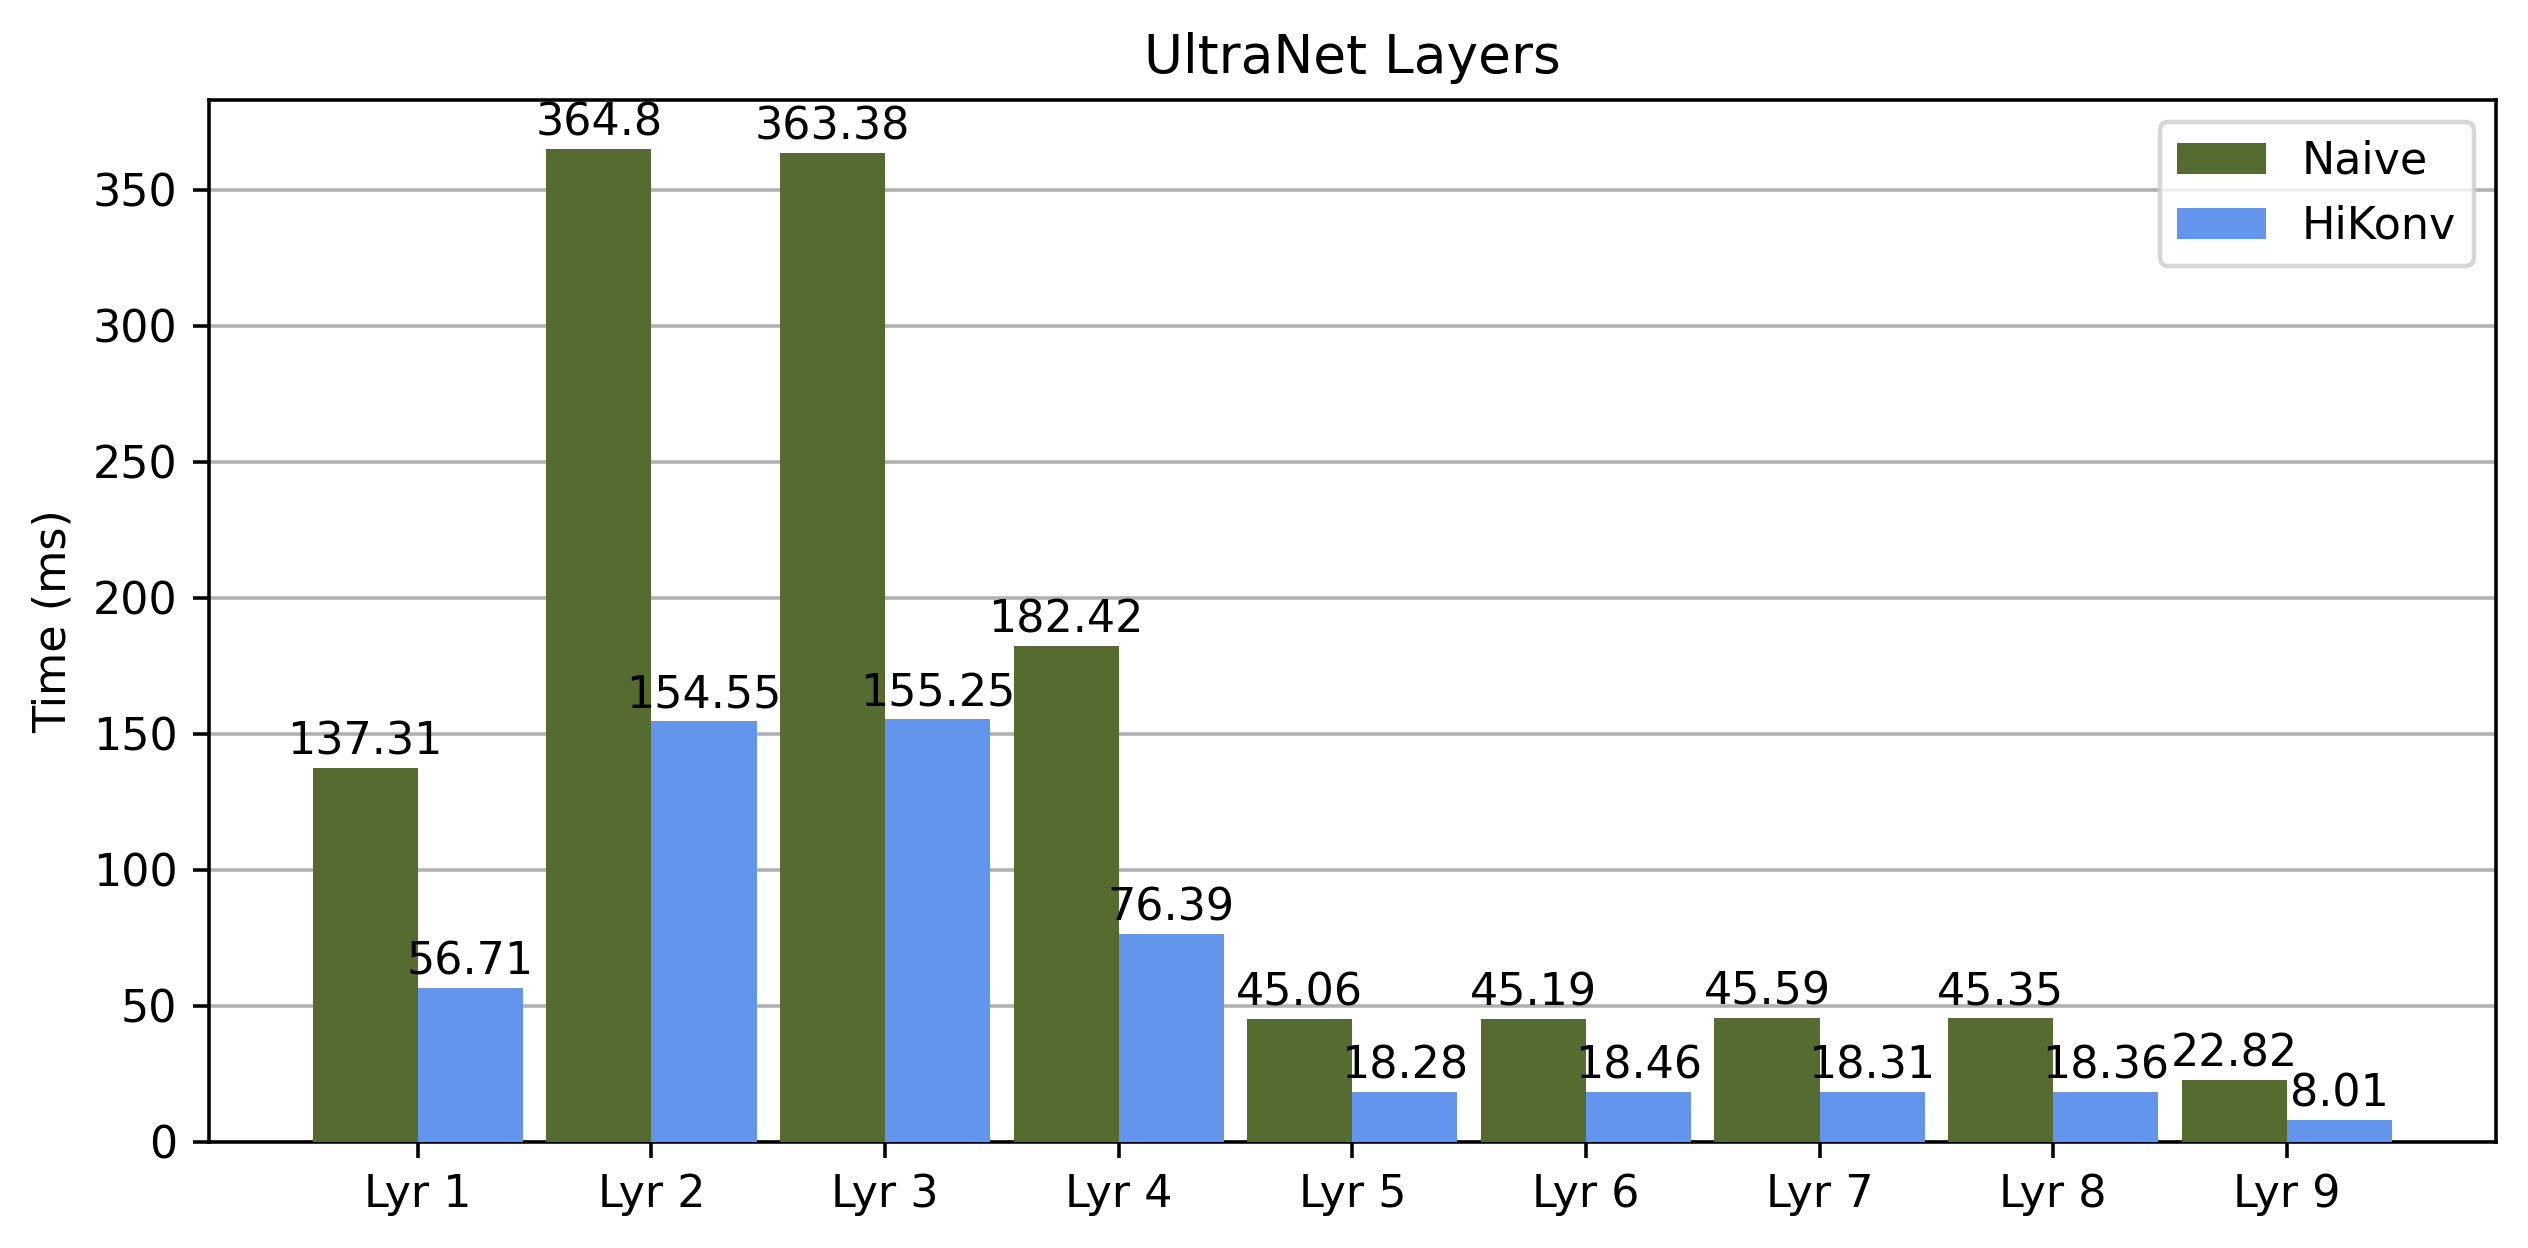

In [9]:
labels = ['Lyr 1', 'Lyr 2', 'Lyr 3', 'Lyr 4', 'Lyr 5', 'Lyr 6', 'Lyr 7', 'Lyr 8', 'Lyr 9']

y_naive = np.array([137313926, 364801530, 363385947, 182429891, 45068392, 45194216, 45590876, 45359983, 22828898])
y_hikonv = np.array([56713414, 154556598, 155259426, 76395196, 18286452, 18463159, 18315911, 18363522, 8013897])
# y_1d_split = 40047*(np.array([8.5, 8.55, 8.5, 8.1, 8, 7.7, 7.5, 7.3]) + 0.1*(np.random.rand(8)-0.5))*0.1

y_speed = y_naive/y_hikonv
print(y_speed)

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4), dpi=320)
rects1 = ax.bar(x - width/2, y_naive//10000/100, width, color="darkolivegreen", label='Naive', zorder=3)
rects2 = ax.bar(x + width/2, y_hikonv//10000/100, width, color="cornflowerblue", label='HiKonv', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)')
ax.set_title('UltraNet Layers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_ylim([0, 3])
ax.legend()
ax.yaxis.grid(True, zorder=0)

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()

plt.show()

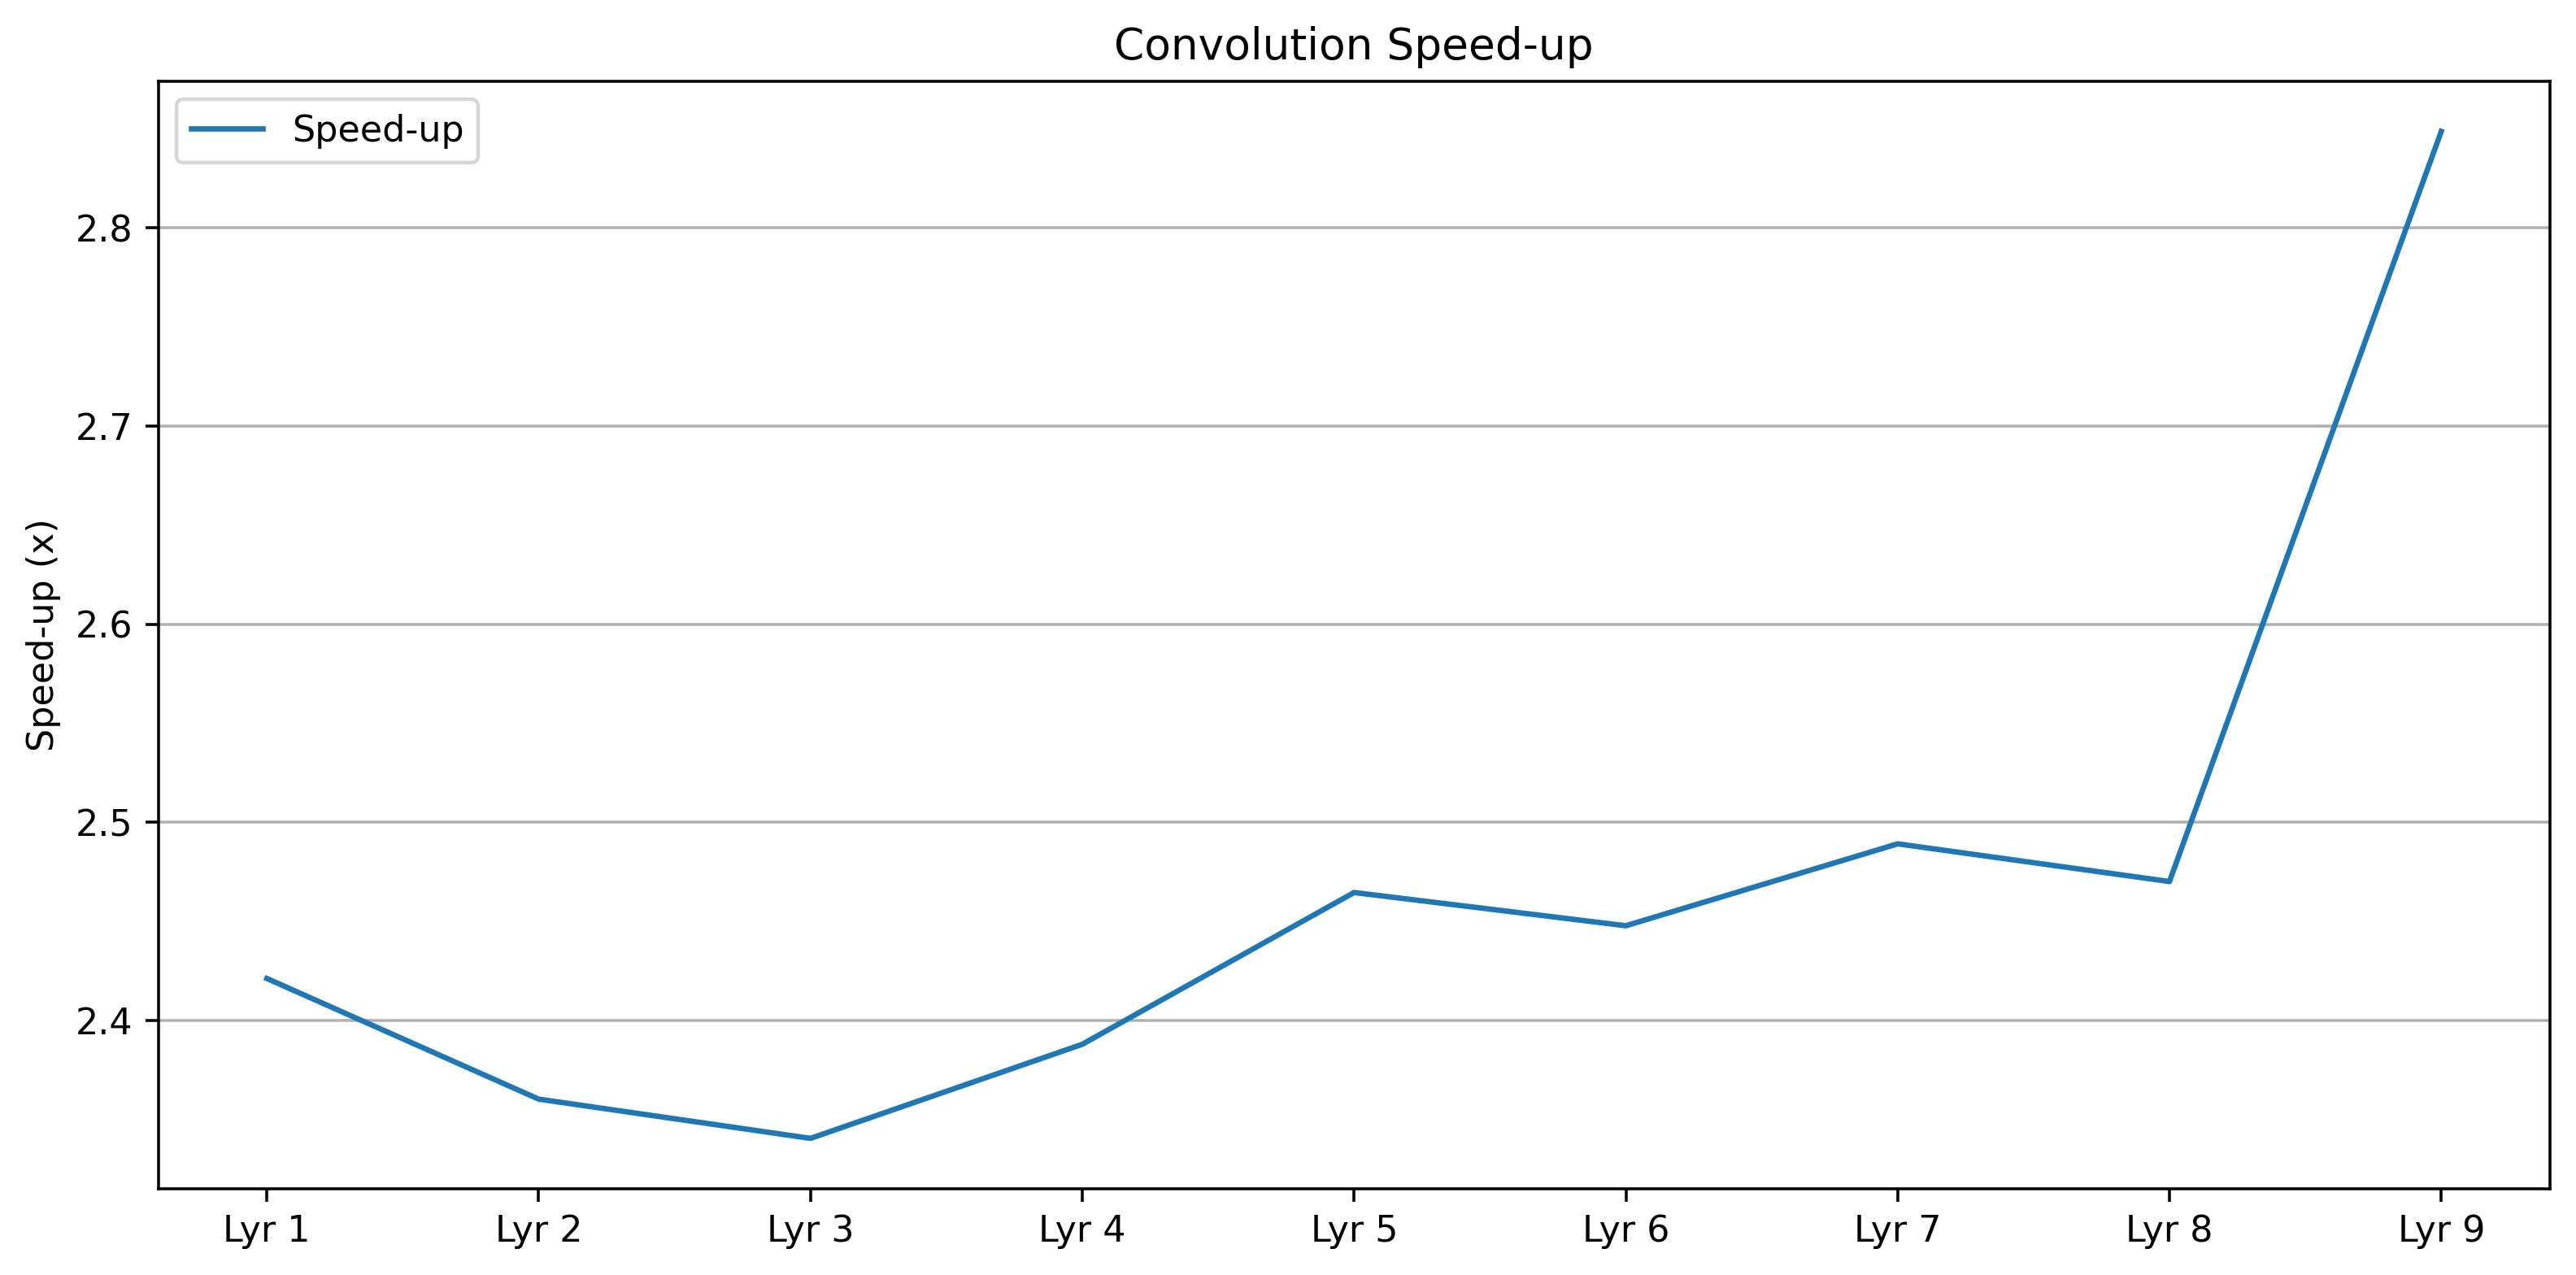

In [3]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=320)

rects1 = ax.plot(x, y_speed, label='Speed-up')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Speed-up (x)')
ax.set_title('Convolution Speed-up')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.grid(True)

fig.tight_layout()

plt.show()

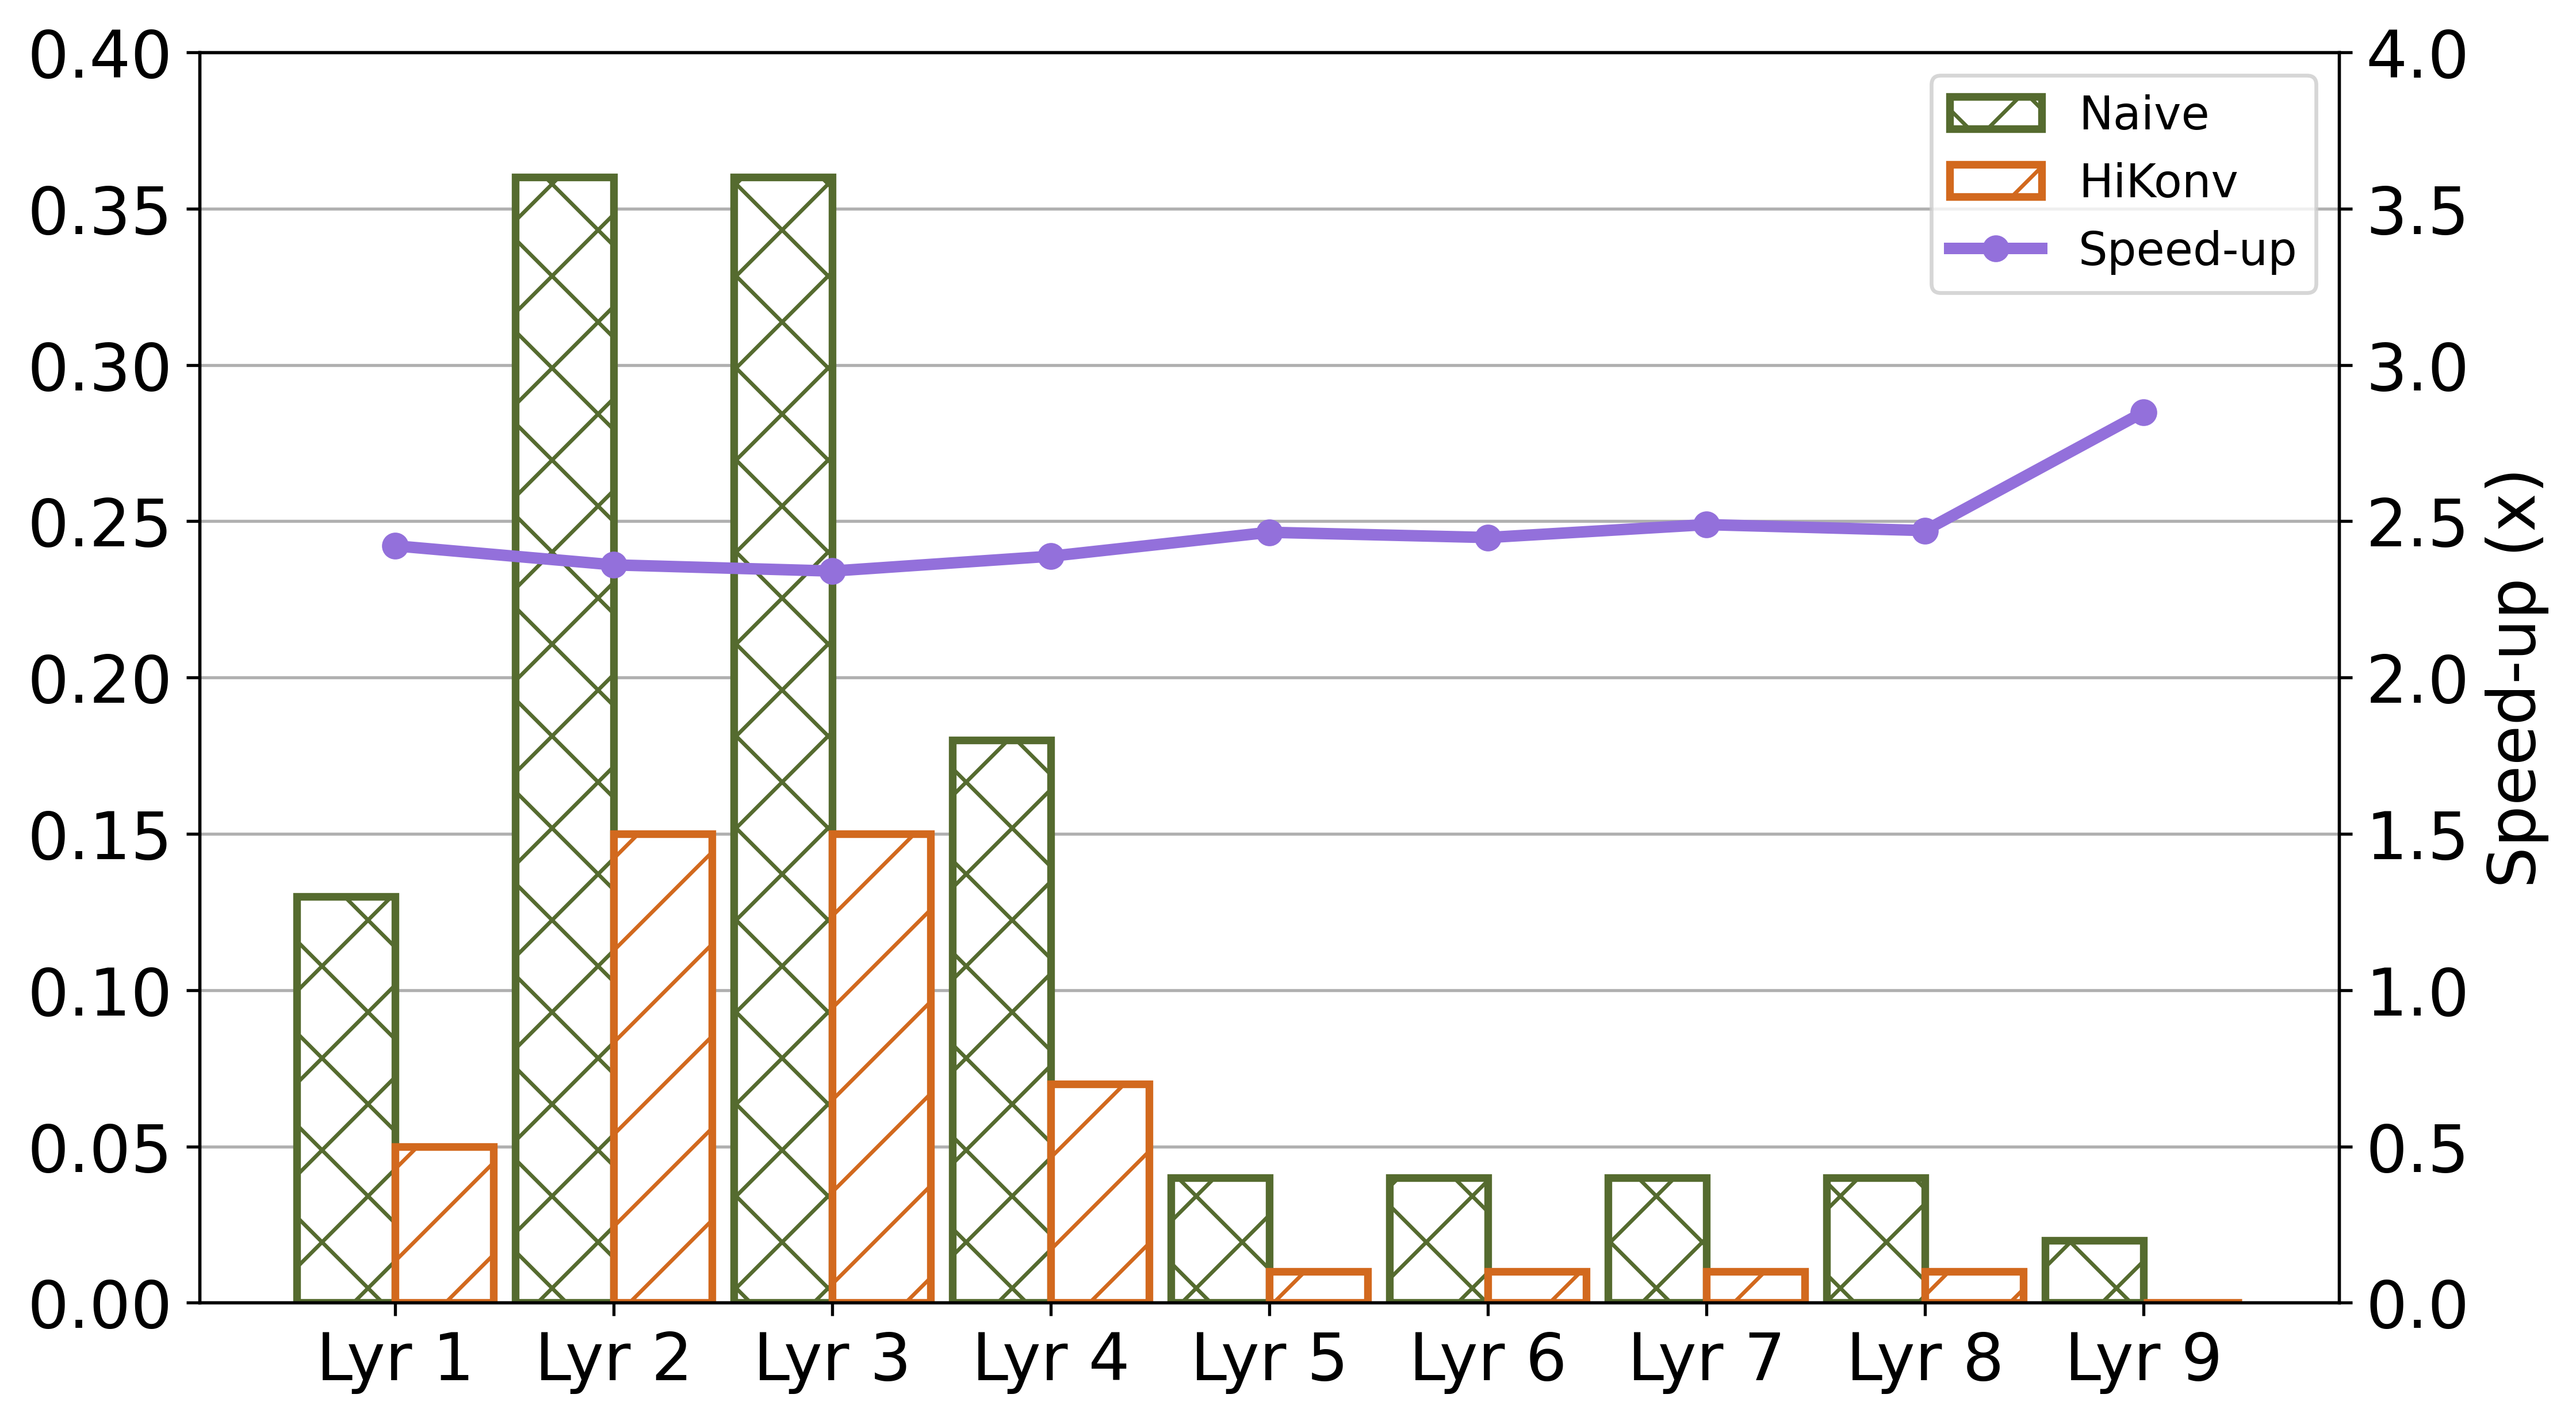

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=480)

twin1 = ax.twinx()
width = 0.45
p1 = ax.bar(x - width/2, y_naive//10000000/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive', zorder=2)
p2 = ax.bar(x + width/2, y_hikonv//10000000/100, width, edgecolor='chocolate', color='w', hatch = '/', linewidth=2, label='HiKonv', zorder=2)
p3, = twin1.plot(x, y_speed, "o-", color="mediumpurple", label='Speed-up', zorder=3, linewidth=3)
# ax.set_ylabel('Time (s)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.set_ylim([0, 0.4])

# ax.bar_label(p1, padding=2, zorder=20)
# ax.bar_label(p2, padding=2, zorder=20)

twin1.set_ylabel('Speed-up (x)', fontsize=17)
# twin1.set_title('Convolution Speed-up')
twin1.set_xticks(x)
twin1.set_xticklabels(labels, fontsize=17)
twin1.set_ylim([0, 4])
ax.yaxis.grid(True, zorder=0)

ax.legend(handles=[p1, p2, p3], fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=17)
plt.yticks(fontsize=17)
plt.show()

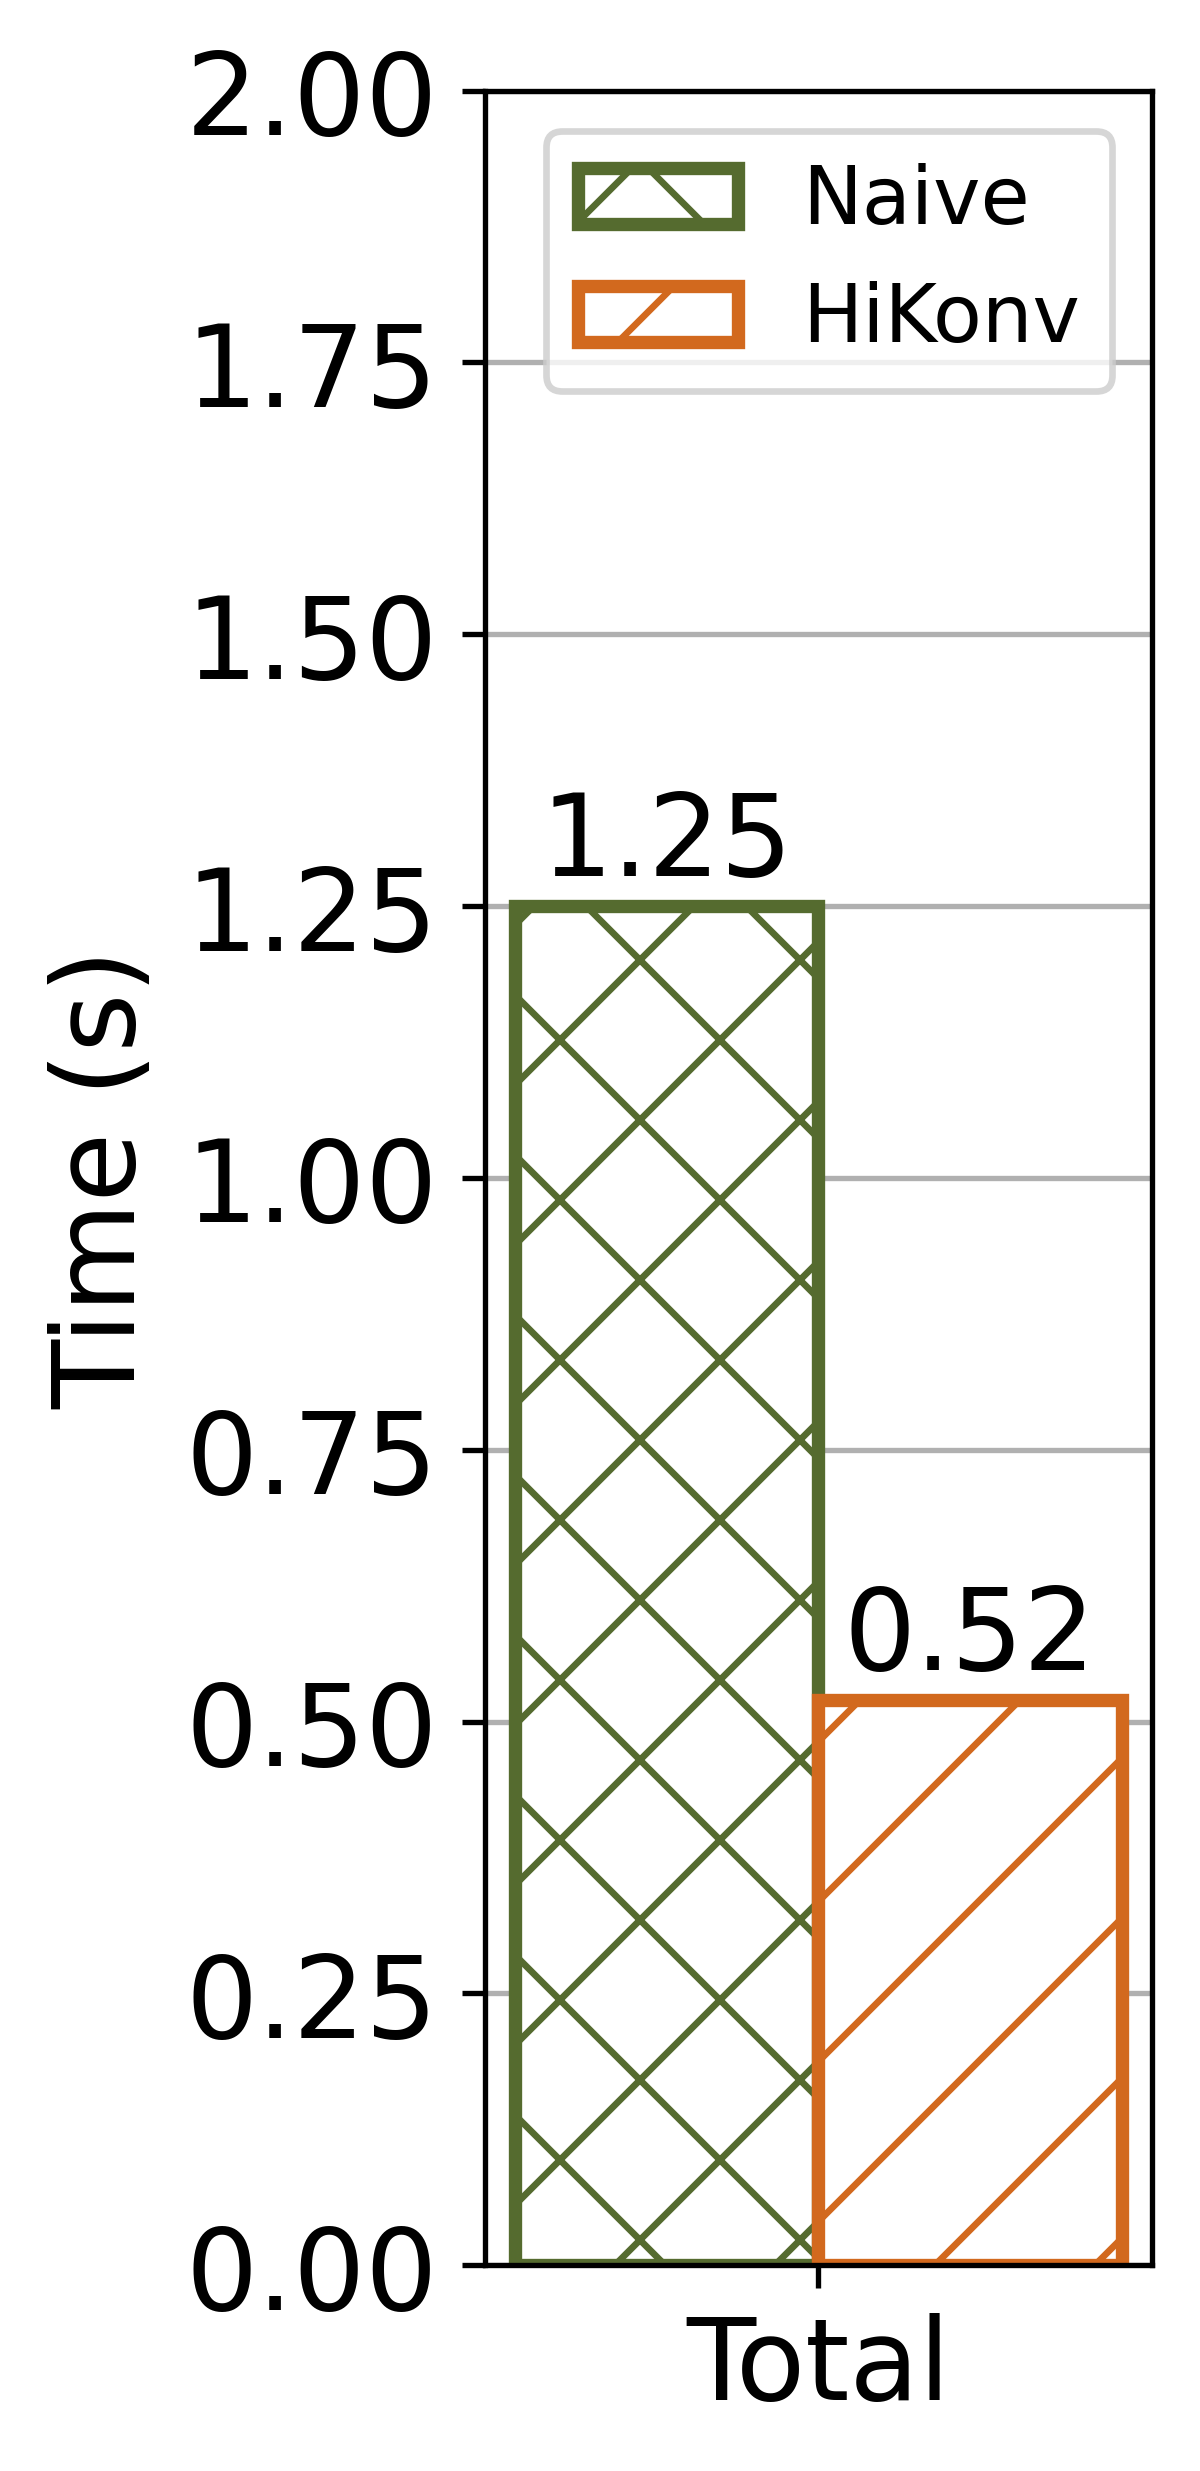

In [12]:
labels = ['Total']

# 1d: f = 100000, k = 3, p4q4

y_naive = np.array([1252055668])
y_hikonv = np.array([524423847])

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(2.6, 5.25), dpi=480)
ax.yaxis.grid(True)
rects1 = ax.bar(x - width/2, y_naive//10000000/100, width, edgecolor='darkolivegreen', color='w', hatch = 'x', linewidth=2, label='Naive', zorder=2)
rects2 = ax.bar(x + width/2, y_hikonv//10000000/100, width, edgecolor='chocolate', color='w', hatch = '/', linewidth=2, label='HiKonv', zorder=2)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)', fontsize=17)
# ax.set_title('1-D Convolution')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
plt.yticks(fontsize=17)
ax.set_ylim([0, 2])
ax.legend(fontsize=12)
ax.yaxis.grid(True, zorder=0)

ax.bar_label(rects1, padding=1, fontsize=17)
ax.bar_label(rects2, padding=1, fontsize=17)

fig.tight_layout()

plt.show()